In [474]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import datetime 
import time
%matplotlib inline
from IPython import get_ipython
ipython = get_ipython()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [475]:
sat = pd.read_csv(os.path.join("..", "Resources", "nycsat.csv"))
race = pd.read_csv(os.path.join("..", "Resources", "satrace.csv"))
poverty = pd.read_csv(os.path.join("..", "Resources", "poverty.csv"))


In [476]:
sat.dropna(how='any',inplace=True)
race.dropna(how='any',inplace=True)
poverty.dropna(how='any',inplace=True)

In [477]:
import datetime
import numpy as np
def subtract_start_end(start_time, end_time):
    try:
        start_date = datetime.datetime.strptime(start_time, "%H:%M")
        end_date = datetime.datetime.strptime(end_time, "%H:%M")
        return (end_date-start_date).seconds/3600.
    except:
        print("{} {}".format(start_time, end_time))
        return np.nan

In [478]:
sat["date_diff"] = sat.apply(lambda row: subtract_start_end(row.start_time, row.end_time), axis=1)


In [479]:
#master = pd.merge(race, sat, on='school_name')

In [480]:
#sat = pd.get_dummies(sat[['borough','date_diff','percent_hispanic', 'percent_asian', 'percent_black','percent_white','percent_tested', 'date_diff', 'enrollment','math_avg', 'writing_avg','reading_avg', 'final_sat']])
sat = pd.get_dummies(sat[['school_name','borough','date_diff','percent_hispanic', 'percent_asian', 'percent_black','percent_white','percent_tested', 'date_diff', 'enrollment','math_avg', 'writing_avg','reading_avg', 'final_sat']],columns=['borough'])


In [481]:
master = pd.merge(race, sat, on='school_name')

In [482]:
poverty.head()

,school_id,school_name,school_disability,disability_percent,esl,esl_percent,poverty,poverty_percent
0,01M015,P.S. 015 Roberto Clemente,65,0.3,19,0.1,171,0.9
1,01M015,P.S. 015 Roberto Clemente,64,0.3,17,0.1,169,0.9
2,01M015,P.S. 015 Roberto Clemente,60,0.3,16,0.1,149,0.8
3,01M015,P.S. 015 Roberto Clemente,51,0.3,12,0.1,152,0.9
4,01M015,P.S. 015 Roberto Clemente,45,0.2,8,0.0,161,0.8


In [483]:
master.head()

,school_id,school_name,rigorous_instruction_element,rigorous_instruction_overall,Unnamed: 4,collaborative_teacher_element,Unnamed: 6,supportive_environment_element,supportive_environment_borough,least_restrictive_environment,...,enrollment,math_avg,writing_avg,reading_avg,final_sat,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island
0,01M448,University Neighborhood High School,4.10,0.87,3.92,0.93,4.40,0.82,0.73,3.30,...,304.0,437.0,352.0,355.0,1144.0,0,0,1,0,0
1,01M450,East Side Community School,4.37,0.87,4.57,0.89,4.53,0.83,0.73,2.64,...,666.0,454.0,445.0,428.0,1327.0,0,0,1,0,0
2,01M696,Bard High School Early College,4.09,0.89,4.25,0.84,4.24,0.81,0.73,2.14,...,545.0,634.0,639.0,641.0,1914.0,0,0,1,0,0
3,02M288,Food and Finance High School,2.70,0.69,2.29,0.65,2.60,0.60,0.73,3.70,...,427.0,428.0,421.0,435.0,1284.0,0,0,1,0,0
4,02M294,Essex Street Academy,4.39,0.84,4.67,0.94,3.71,0.78,0.73,2.71,...,358.0,395.0,387.0,411.0,1193.0,0,0,1,0,0


In [484]:
masters = pd.merge(master, poverty, on="school_id")

In [485]:
#master = master.drop('school_id', axis=1)
master.head()

,school_id,school_name,rigorous_instruction_element,rigorous_instruction_overall,Unnamed: 4,collaborative_teacher_element,Unnamed: 6,supportive_environment_element,supportive_environment_borough,least_restrictive_environment,...,enrollment,math_avg,writing_avg,reading_avg,final_sat,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island
0,01M448,University Neighborhood High School,4.10,0.87,3.92,0.93,4.40,0.82,0.73,3.30,...,304.0,437.0,352.0,355.0,1144.0,0,0,1,0,0
1,01M450,East Side Community School,4.37,0.87,4.57,0.89,4.53,0.83,0.73,2.64,...,666.0,454.0,445.0,428.0,1327.0,0,0,1,0,0
2,01M696,Bard High School Early College,4.09,0.89,4.25,0.84,4.24,0.81,0.73,2.14,...,545.0,634.0,639.0,641.0,1914.0,0,0,1,0,0
3,02M288,Food and Finance High School,2.70,0.69,2.29,0.65,2.60,0.60,0.73,3.70,...,427.0,428.0,421.0,435.0,1284.0,0,0,1,0,0
4,02M294,Essex Street Academy,4.39,0.84,4.67,0.94,3.71,0.78,0.73,2.71,...,358.0,395.0,387.0,411.0,1193.0,0,0,1,0,0


In [486]:
#master = pd.merge(race, sat, on= 'school_name', how= 'inner')

In [487]:
final = masters.dropna(subset=['math_avg', 'writing_avg', 'reading_avg', 'final_sat','percent_black', 'percent_white', 'percent_hispanic', 'percent_asian', 'enrollment', 'percent_tested'])


In [488]:
#race = race.rename(columns={"Collaborative_Teachers_Element ":"Collaborative_Teachers_Element"})


In [489]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
#r = sat.zip_code.values.reshape(-1, 1)
#q = sat.city.values.reshape(-1, 1)
#l = Trust_Element_Score(-1, 1)
#m = Effective_School_Leadership(-1, 1)
#n = Supportive_Environment_Borough(-1, 1)
#o = Rigorous_Instruction_Element(-1, 1)
#p = Supportive_Environment_Overall(-1, 1)
#q = Rigorous_Instruction_Overall(-1, 1)
#r = Collaborative_Teachers_Element(-1, 1)
s = sat.percent_hispanic.values.reshape(-1, 1)
t = sat.percent_asian.values.reshape(-1, 1)
u = sat.percent_black.values.reshape(-1, 1)
v = sat.percent_tested.values.reshape(-1, 1)
w = sat.date_diff.values.reshape(-1, 1)
X = sat.enrollment.values.reshape(-1, 1)
y = sat.final_sat.values.reshape(-1, 1)

In [539]:
y = final["final_sat"].values.reshape(-1, 1)
# print(X.shape, y.shape)
#X = master[["percent_tested", "percent_hispanic", "percent_white","borough_Bronx","borough_Brooklyn","borough_Manhattan", "borough_Queens","borough_Staten_Island","date_diff", "enrollment", "Rigorous_Instruction_Overall", "Supportive_Environment_Overall", "Collaborative_Teachers_Element"]]

X = final[["school_disability", "disability_percent", "esl", "esl_percent", "poverty", "poverty_percent", "rigorous_instruction_element", "rigorous_instruction_overall", "collaborative_teacher_element", "supportive_environment_element", "supportive_environment_borough", "least_restrictive_environment", "value_percentage_students_90", "percentage_students_90", "effective_school_leadership", "school_leadership", "family_community_overall", "family_community_borough", "Trust_Score", "Trust_Percent", "teacher_response", "parent_response", "enrollment", "percent_tested", "date_diff", "borough_Bronx", "borough_Brooklyn", "borough_Manhattan", "borough_Queens", "borough_Staten_Island"]]
    

In [540]:
target = master["final_sat"]

In [541]:
#master = master.drop('Life Sciences Secondary School', axis=1)
master.head()

,school_id,school_name,rigorous_instruction_element,rigorous_instruction_overall,Unnamed: 4,collaborative_teacher_element,Unnamed: 6,supportive_environment_element,supportive_environment_borough,least_restrictive_environment,...,enrollment,math_avg,writing_avg,reading_avg,final_sat,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island
0,01M448,University Neighborhood High School,4.10,0.87,3.92,0.93,4.40,0.82,0.73,3.30,...,304.0,437.0,352.0,355.0,1144.0,0,0,1,0,0
1,01M450,East Side Community School,4.37,0.87,4.57,0.89,4.53,0.83,0.73,2.64,...,666.0,454.0,445.0,428.0,1327.0,0,0,1,0,0
2,01M696,Bard High School Early College,4.09,0.89,4.25,0.84,4.24,0.81,0.73,2.14,...,545.0,634.0,639.0,641.0,1914.0,0,0,1,0,0
3,02M288,Food and Finance High School,2.70,0.69,2.29,0.65,2.60,0.60,0.73,3.70,...,427.0,428.0,421.0,435.0,1284.0,0,0,1,0,0
4,02M294,Essex Street Academy,4.39,0.84,4.67,0.94,3.71,0.78,0.73,2.71,...,358.0,395.0,387.0,411.0,1193.0,0,0,1,0,0


In [542]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(master, target, random_state=42)


In [543]:
from sklearn import tree
import pandas as pd
import os

In [544]:
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

In [545]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [546]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/anaconda3/envs/utdata/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [547]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/anaconda3/envs/utdata/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [548]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/anaconda3/envs/utdata/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/envs/utdata/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [549]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

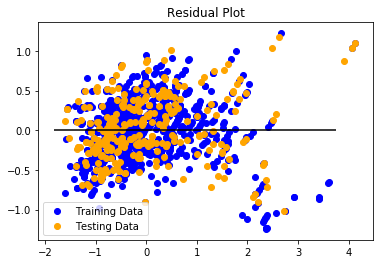

In [550]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [551]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-0.33533523 -0.16428193 -0.05052162 -0.38346567  0.05148987 -0.28723367
  -0.05320145  0.0906133  -0.12481703  0.13593781 -0.0363537   0.00514327
   0.38761042 -0.13646825 -0.07721125 -0.02744302 -0.05011736 -0.0170694
   0.06143981  0.03626368 -0.02030711  0.01075335  0.43487447 -0.03298246
  -0.02464537 -0.02464537  0.0702748  -0.06802928  0.04840315 -0.05779665
   0.01209722]]
y-axis intercept:  [1.83113065e-15]


In [552]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1648797301099229, R2: 0.845529489169245


In [553]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1563765959248508, R2: 0.8534958018285081


In [554]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.164873091418423, R2: 0.8455357087455784


In [555]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1572599234512216, R2: 0.8526682407078147
